# Machine Learning II

## Índice
1. [Introdução](#Intrpdução)

### Introdução

Este trabalho tem como objetivo desenvolver um modelo de aprendizagem profundo para classificação de sons utilizando o UrbanSound8K, um dataset amplamente utilizado para análise de áudio urbano. 
Este dataset contém um total de 8732 audio recordings de sons urbanos, cada com uma duração até 4 segundos. Cada excerto está classificado com uma das seguintes classes:
- 0 = air_conditioner
- 1 = car_horn
- 2 = children_playing
- 3 = dog_bark
- 4 = drilling
- 5 = engine_idling
- 6 = gun_shot
- 7 = jackhammer
- 8 = siren
- 9 = street_music

O objetivo deste projecto assenta em definir, compilar, treinar e avaliar dois classificadores de Deep Learning. Os modelos  de Deep Learning a ser considerados são: 
- Multilayer Perceptron (MLP)
- Convolutional Neural Network (CNN)
- Recurrent Neural Network (RNN)

Neste notebook,nós vamos nos focar no desenvolvimento de ...


In [1]:
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [3]:
df = pd.read_csv("UrbanSound8k.csv")
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


Vamos ver agora a distribuição do nosso target

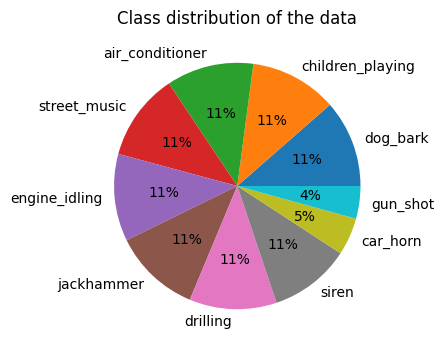

In [4]:
df['class'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(4,4))
plt.title('Class distribution of the data')
plt.ylabel('')
plt.show()

C:\Users\kikot\AppData\Local\Temp\ipykernel_24832\3933366440.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


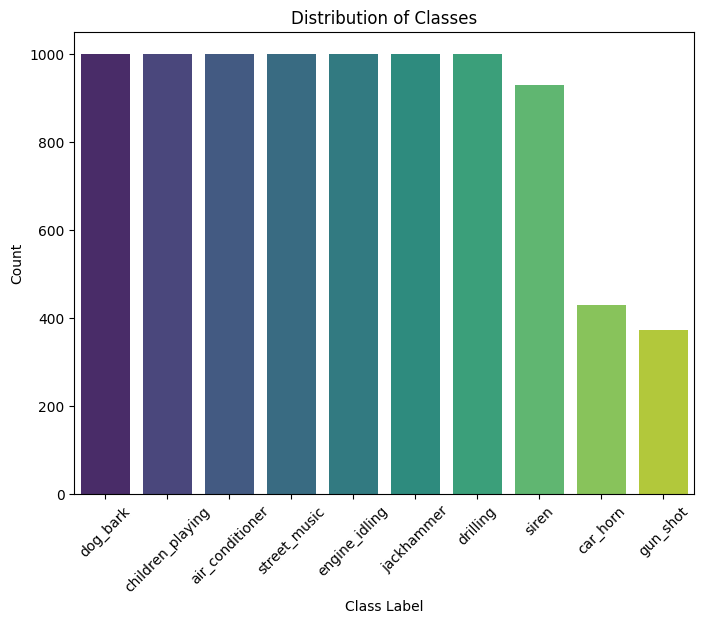

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = df['class'].value_counts()

# Plot the distribution of classes
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

# Add labels and title
plt.title('Distribution of Classes')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability

# Display the plot
plt.show()

Aqui o sinal processado de um ficheiro audio (provavelmente vai se apagar, acho que não serve para nada), mas fala se no guião do projeto disto.

In [6]:
import numpy as np
import librosa

# Definir parâmetros
SAMPLE_RATE = 22050
DURATION = 4
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

def process_audio_file(file_path, sample_rate=SAMPLE_RATE, duration=DURATION):
    signal, sr = librosa.load(file_path, sr=sample_rate)
    
    if len(signal) < SAMPLES_PER_TRACK:
        padding = SAMPLES_PER_TRACK - len(signal)
        signal = np.pad(signal, (0, padding), 'constant')
    else:
        signal = signal[:SAMPLES_PER_TRACK]
    
    return signal

file_path = "UrbanSound8K/audio/fold1_4sec/7061-6-0-0.wav" #mudar isto para o fold1 antes de se fazer a padronização para 4 segundos
audio_signal = process_audio_file(file_path)

print(f"Tamanho do sinal processado: {len(audio_signal)}")

Tamanho do sinal processado: 88200


In [10]:
print(df.dtypes)

slice_file_name     object
fsID                 int64
start              float64
end                float64
salience             int64
fold                 int64
classID              int64
class               object
dtype: object


FALTA FAZER RESAMPLING DOS DADOS porque eles tem diferentes sample rates.

Vamos passar a padronizar todos os audios para 4 segundos e guarda-los nos folders.

In [ ]:
"""""
import os
import librosa
import numpy as np
import soundfile as sf

input_path = "UrbanSound8K/audio"

# Array de pastas para analisar
folders_to_analyze = [folder for folder in os.listdir(input_path)]
folders_to_analyze.sort()  # Ordena as pastas
print(folders_to_analyze)

target_duration = 4.0

def repeat_audio_to_duration(y, sr, target_duration):
    original_duration = librosa.get_duration(y=y, sr=sr)
    while original_duration < target_duration:
        y = np.concatenate([y, y])
        original_duration = librosa.get_duration(y=y, sr=sr)
    y = y[:int(target_duration * sr)]
    return y

# Processamento dos arquivos de áudio
for audio_folder in folders_to_analyze:
    audio_folder_path = os.path.join(input_path, audio_folder)

    if os.path.isdir(audio_folder_path):
        for audio in os.listdir(audio_folder_path):
            # Verifique se o arquivo é `.wav`
            if audio.endswith('.wav'):
                audio_file_path = os.path.join(audio_folder_path, audio)

                try:
                    # Carregar o arquivo de áudio
                    y, sr = librosa.load(audio_file_path, sr=None)

                    # Criar pasta de saída
                    output_folder_path = os.path.join(input_path, f"{audio_folder}_4sec")
                    os.makedirs(output_folder_path, exist_ok=True)

                    # Ajustar duração do áudio
                    if librosa.get_duration(y=y, sr=sr) != target_duration:
                        y = repeat_audio_to_duration(y, sr, target_duration)
                        print(f"Áudio ajustado para {target_duration} segundos e salvo em {output_folder_path}")
                    else:
                        print(f"Áudio já possui {target_duration} segundos, salvo em {output_folder_path}")

                    # Salvar o arquivo ajustado
                    sf.write(os.path.join(output_folder_path, audio), y, sr)

                except Exception as e:
                    print(f"Erro ao carregar {audio}: {e}")

          """""

Este código automatiza o pré-processamento dos arquivos de áudio do dataset UrbanSound8K para garantir que todos tenham a mesma duração de 4 segundos. A padronização é essencial para que os modelos de machine learning recebam inputs de tamanho fixo, o que facilita o treinamento e melhora a performance dos algoritmos.

In [7]:
import os

# Função para contar o número de arquivos .wav em cada fold
def count_audio_files(base_dir):
    # Itera sobre cada pasta no diretório base
    for folder in os.listdir(base_dir):
        fold_dir = os.path.join(base_dir, folder)
        
        # Verifica se o caminho é uma pasta
        if os.path.isdir(fold_dir):
            # Conta quantos arquivos .wav existem na pasta
            audio_files = [f for f in os.listdir(fold_dir) if f.lower().endswith('.wav')]
            num_audio_files = len(audio_files)
            
            # Exibe a quantidade de arquivos para cada fold
            print(f"Fold: {folder}, Número de arquivos .wav: {num_audio_files}")

# Caminho para o diretório base onde os folds estão localizados
base_dir = "C:UrbanSound8k/audio"

# Chama a função
count_audio_files(base_dir)


Fold: fold10_4sec, Número de arquivos .wav: 837
Fold: fold1_4sec, Número de arquivos .wav: 873
Fold: fold2_4sec, Número de arquivos .wav: 888
Fold: fold3_4sec, Número de arquivos .wav: 925
Fold: fold4_4sec, Número de arquivos .wav: 990
Fold: fold5_4sec, Número de arquivos .wav: 936
Fold: fold6_4sec, Número de arquivos .wav: 823
Fold: fold7_4sec, Número de arquivos .wav: 838
Fold: fold8_4sec, Número de arquivos .wav: 806
Fold: fold9_4sec, Número de arquivos .wav: 816


Aqui contamos os numero de ficheiro agora padronizados a 4 segundos de cada folder para verificar que nenhum se perdeu durante o processo. (fazer secalhar um count antes para mostar o nuemro antes pu então apaga se os dois)

Formato do espectrograma Mel: (128, 320)


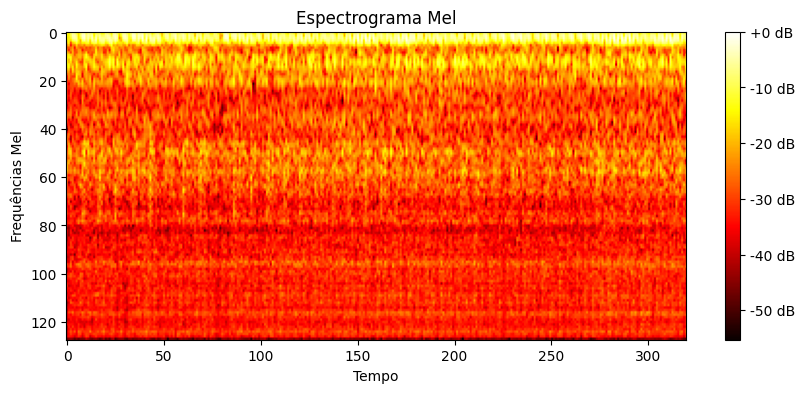

In [40]:
import soundata
import librosa
import numpy as np
import matplotlib.pyplot as plt

dataset = soundata.initialize('urbansound8k')

clip = dataset.choice_clip()

audio_path = clip.audio_path
y, sr = librosa.load(audio_path, sr=22050)

SAMPLE_RATE = 22050
HOP_LENGTH = round(SAMPLE_RATE * 0.0125)  # Exemplo: 12,5ms
WIN_LENGTH = round(SAMPLE_RATE * 0.023)   # Exemplo: 23ms
N_FFT = 2**10                             # Comprimento da FFT (1024 pontos)

mel_spec = librosa.feature.melspectrogram(y=y, sr=SAMPLE_RATE, n_fft=N_FFT, 
                                          hop_length=HOP_LENGTH, win_length=WIN_LENGTH)

mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)


print(f"Formato do espectrograma Mel: {mel_spec_db.shape}")
plt.figure(figsize=(10, 4))
plt.imshow(mel_spec_db, cmap='hot', aspect='auto')
plt.colorbar(format='%+2.0f dB')
plt.title("Espectrograma Mel")
plt.xlabel("Tempo")
plt.ylabel("Frequências Mel")
plt.show()


### Extração de Features

In [ ]:
import os
import librosa
import numpy as np
import pandas as pd

# Função para extrair diversas features de um arquivo de áudio
def extract_features_from_file(file_path, n_mfcc=13):
    try:
        # Carregar o áudio usando uma taxa de amostragem padrão
        y, sr = librosa.load(file_path, sr=22050)  # Reamostragem para evitar problemas de Nyquist
        
        # Definir os limites de frequência
        fmin = 50
        fmax = sr / 2  # Frequência de Nyquist
        
        # 1. Extrair MFCC
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        mfcc_mean = np.mean(mfcc, axis=1)  # Média de cada MFCC ao longo do tempo
        
        # 2. Extrair Chroma com limites de frequência
        chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12)
        chroma_mean = np.mean(chroma, axis=1)
        
        # 3. Extrair Mel Spectrogram com número reduzido de bandas
        mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40, fmin=fmin, fmax=fmax)
        mel_mean = np.mean(mel_spectrogram, axis=1)
        
        # 4. Extrair Spectral Contrast
        spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, fmin=fmin)
        spectral_contrast_mean = np.mean(spectral_contrast, axis=1)
        
        # Concatenar todas as features extraídas
        features = np.hstack((
            mfcc_mean,          # 13 MFCC
            chroma_mean,        # 12 Chroma
            mel_mean[:40],      # 40 Mel Spectrogram bands
            spectral_contrast_mean  # 7 Spectral Contrast
        ))
        
        return features

    except Exception as e:
        print(f"Erro ao processar o arquivo {file_path}: {e}")
        return None

# Lista de pastas (fold1_4sec até fold10_4sec)
folds = [f"fold{i}_4sec" for i in range(1, 11)]

# Dataframe para armazenar todas as features extraídas
all_features = []

# Iterar sobre cada pasta
for fold in folds:
    fold_path = os.path.join('UrbanSound8k/audio', fold)
    
    if os.path.exists(fold_path):
        # Listar todos os arquivos dentro da pasta
        for filename in os.listdir(fold_path):
            file_path = os.path.join(fold_path, filename)
            if os.path.isfile(file_path) and filename.endswith(".wav"):
                # Extrair features do arquivo de áudio
                features = extract_features_from_file(file_path)
                if features is not None:
                    # Adicionar o nome da pasta (fold) e o nome do arquivo à lista de features
                    features = np.append(features, [fold, filename])
                    all_features.append(features)
    else:
        print(f"Pasta {fold_path} não encontrada!")


mfcc_columns = [f'mfcc_{i+1}' for i in range(13)]
chroma_columns = [f'chroma_{i+1}' for i in range(12)]
mel_columns = [f'mel_{i+1}' for i in range(40)]
spectral_contrast_columns = [f'spectral_contrast_{i+1}' for i in range(7)]
columns = mfcc_columns + chroma_columns + mel_columns + spectral_contrast_columns + ['fold', 'filename']

df = pd.DataFrame(all_features, columns=columns)

df.to_csv('urban_sound_features.csv', index=False)

print("Extração de features concluída e salva em urban_sound_features.csv!")


MFCC (Mel-Frequency Cepstral Coefficients) - Os MFCCs são uma representação compacta das características de um som, extraindo informações relacionadas à percepção auditiva humana.
Em análise de áudio, normalmente 13 coeficientes são usados (às vezes até 20), porque se descobriu empiricamente que os primeiros coeficientes carregam a maior parte da informação relevante para tarefas de classificação de áudio.

Chroma Features (Cromagrama) - As Chroma Features representam a energia distribuída ao longo de cada uma das 12 notas da escala cromática ocidental, e é comum em tarefas como identificação de acordes ou análise de harmonia musical.

Mel Spectrogram (Espectrograma em escala Mel) - O Mel Spectrogram é uma representação da potência espectral do som em uma escala de frequência mel, que reflete melhor como os humanos percebem a frequência sonora. Normalmente, são escolhidos entre 20 a 40 filtros de Mel, dependendo da resolução desejada. Neste caso, foi escolhido 40 para capturar mais detalhes das características de frequência, fornecendo uma boa discriminação entre diferentes tipos de sons

Spectral Contrast (Contraste Espectral) - Mede a diferença de energia entre os picos e os vales no espectro de frequência. Essas características são usadas para distinguir entre diferentes tipos de sons e texturas, como vozes, música e ruídos ambientais.

#### Divisão Treino/Teste

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='class') 
y = df['class'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Distribuição no conjunto de treino: {np.bincount(y_train)}")

Distribuição no conjunto de treino: [797 343 817 799 794 807 302 792 764 770]


Como tinhamos visto antes, tinhamos duas classes bastante desbalenceadas, por isso após fazer a divisão treino/teste, iremos aplicar o método SMOTE nos dados treino.

In [18]:
from imblearn.over_sampling import SMOTE

# Aplicando o SMOTE no conjunto de treino
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Verificar a distribuição das classes após o SMOTE
print(f"Distribuição após o SMOTE: {np.bincount(y_res)}")

Distribuição após o SMOTE: [817 817 817 817 817 817 817 817 817 817]


Agora que já possuímos as classes balaceadas podemos passar para a implementação dos modelos de deep learning.

In [26]:

features_df = pd.read_csv('urban_sound_features.csv')

metadata_df = pd.read_csv('UrbanSound8K.csv')

merged_df = pd.merge(features_df, metadata_df, left_on='slice_file_name', right_on='slice_file_name', how='left')

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")

Tamanho do conjunto de treino: 6985
Tamanho do conjunto de teste: 1747


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = merged_df.drop(columns=['fold_y', 'slice_file_name', 'slice_file_name', 'start', 'end', 'class', 'classID'])
y = merged_df['class']  # ou use 'classID' se preferir

print("Formato de X:", X.shape)
print("Formato de y:", y.shape)

Formato de X: (8732, 75)
Formato de y: (8732,)


In [28]:
# Remover colunas de texto antes de aplicar SMOTE
X = df.drop(columns=['fold_x','fold_y', 'slice_file_name', 'class'])  # Remover 'fold' e 'filename', e outras colunas não numéricas
y = df['class']  # Coluna com as classes

# Divisão em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Agora aplicar SMOTE no conjunto de treino
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificar as novas dimensões após SMOTE
print(f"Tamanho do conjunto de treino após SMOTE: {X_train_resampled.shape}")
print(f"Tamanho do rótulo de treino após SMOTE: {y_train_resampled.shape}")


KeyError: "['fold_x', 'fold_y', 'slice_file_name'] not found in axis"

In [27]:
import pandas as pd

# Carregar o dataset, considerando que você tem um dataframe com os dados
# Exemplo: df = pd.read_csv('seu_dataset.csv')

# Agrupar por fold e class
distribution = df.groupby(['fold', 'class']).size().reset_index(name='count')

# Exibir a distribuição por fold
print(distribution)

    fold  class  count
0      1      0    100
1      1      1     36
2      1      2    100
3      1      3    100
4      1      4    100
..   ...    ...    ...
95    10      5     93
96    10      6     32
97    10      7     96
98    10      8     83
99    10      9    100

[100 rows x 3 columns]


Estava a tentar ver a distribuição fold a fold para a possibilidade de ser fazer cross validation com 10 folders, mas para isso cada dataset teria de ter um dataset desse folder, ou então é só a minha cabeça que está a bugar.

In [36]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Carregar os dados (substitua pelo seu DataFrame 'df')
# Exemplo: df = pd.read_csv('seu_arquivo.csv')

# Separar as colunas de features e target (classe)
X = merged_df.drop(columns=['class', 'slice_file_name', 'fold_x', 'fold_y'])  # Features
y = merged_df['class']  # Target (classe)

# 1. Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Distribuição de classes original:")
print(y.value_counts())  # Antes de aplicar o SMOTE
# 2. Aplicar SMOTE para balancear as classes no conjunto de treino
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("\nDistribuição de classes após o SMOTE:")
print(pd.Series(y_train_resampled).value_counts())
# 3. Normalização (escala entre 0 e 1)
scaler = MinMaxScaler()

# Ajuste o scaler aos dados de treino e transforme tanto o treino quanto o teste
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Verificando os tamanhos após o SMOTE
print(f"Tamanho do conjunto de treino após SMOTE: {X_train_resampled.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")

# Verificando a distribuição das classes após o SMOTE
print(f"Distribuição das classes no treino após SMOTE:\n{pd.Series(y_train_resampled).value_counts()}")

# Agora, você pode seguir com o treinamento do modelo utilizando os conjuntos X_train_resampled e y_train_resampled


Distribuição de classes original:
class
dog_bark            1000
jackhammer          1000
engine_idling       1000
children_playing    1000
street_music        1000
air_conditioner     1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

Distribuição de classes após o SMOTE:
class
engine_idling       800
jackhammer          800
air_conditioner     800
dog_bark            800
car_horn            800
drilling            800
children_playing    800
siren               800
street_music        800
gun_shot            800
Name: count, dtype: int64
Tamanho do conjunto de treino após SMOTE: 8000
Tamanho do conjunto de teste: 1747
Distribuição das classes no treino após SMOTE:
class
engine_idling       800
jackhammer          800
air_conditioner     800
dog_bark            800
car_horn            800
drilling            800
children_playing    800
siren               800
street_music        800
gun_shot            80

In [35]:
X_train_resampled_df = pd.DataFrame(X_train_resampled)

# Converter y_train_resampled para um DataFrame
y_train_resampled_df = pd.DataFrame(y_train_resampled)

# Exibir as primeiras linhas dos dados de treino balanceados
print(X_train_resampled_df.head())
print(y_train_resampled_df.head())

         0         1         2         3         4         5         6   \
0  0.494571  0.562502  0.593634  0.807395  0.608814  0.595700  0.626836   
1  0.668333  0.439667  0.600541  0.562498  0.476663  0.519716  0.405303   
2  0.812843  0.346234  0.588819  0.492550  0.616611  0.575301  0.549373   
3  0.681232  0.601966  0.544926  0.524019  0.633372  0.485206  0.567885   
4  0.486296  0.428159  0.610137  0.421034  0.690288  0.463736  0.424576   

         7         8         9   ...        67        68        69        70  \
0  0.627897  0.643525  0.678166  ...  0.201577  0.350810  0.094661  0.080560   
1  0.496288  0.549941  0.577641  ...  0.106204  0.201745  0.083884  0.105836   
2  0.598613  0.491225  0.594137  ...  0.087724  0.278494  0.073247  0.070189   
3  0.489838  0.610662  0.583632  ...  0.097626  0.219976  0.064174  0.061399   
4  0.360488  0.465312  0.528829  ...  0.123711  0.332604  0.228293  0.187763   

         71        72        73        74   75        76  
0  0.3896

Tentativa de normalizar o dataset com o MinMax scaler, acho que está bem, mas queria manter os nomes das colunas e isto tem de ser feito antes da divisão treino, teste.

In [2]:
from sklearn.preprocessing import MinMaxScaler

# Carregar o dataset
data_path = "urban_sound_features.csv"  # Substitua pelo caminho correto
df = pd.read_csv(data_path)

# Excluir colunas que não devem ser normalizadas (e.g., identificadores, categorias)
columns_to_normalize = [
    'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 
    'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13',
    'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6', 
    'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11', 'chroma_12',
    'mel_1', 'mel_2', 'mel_3', 'mel_4', 'mel_5', 'mel_6', 'mel_7', 'mel_8',
    'mel_9', 'mel_10', 'mel_11', 'mel_12', 'mel_13', 'mel_14', 'mel_15', 
    'mel_16', 'mel_17', 'mel_18', 'mel_19', 'mel_20', 'mel_21', 'mel_22',
    'mel_23', 'mel_24', 'mel_25', 'mel_26', 'mel_27', 'mel_28', 'mel_29', 
    'mel_30', 'mel_31', 'mel_32', 'mel_33', 'mel_34', 'mel_35', 'mel_36', 
    'mel_37', 'mel_38', 'mel_39', 'mel_40',
    'spectral_contrast_1', 'spectral_contrast_2', 'spectral_contrast_3', 
    'spectral_contrast_4', 'spectral_contrast_5', 'spectral_contrast_6', 
    'spectral_contrast_7'
]


scaler = MinMaxScaler()

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print(df.head())



     mfcc_1    mfcc_2    mfcc_3    mfcc_4    mfcc_5    mfcc_6    mfcc_7  \
0  0.394815  0.487238  0.704878  0.363729  0.592181  0.468815  0.396327   
1  0.434964  0.585360  0.750869  0.306748  0.544895  0.454334  0.292322   
2  0.373800  0.419088  0.673635  0.429886  0.649246  0.468756  0.451878   
3  0.562282  0.504424  0.473479  0.358361  0.578244  0.393904  0.548114   
4  0.467605  0.602101  0.713795  0.540341  0.567482  0.453473  0.488212   

     mfcc_8    mfcc_9   mfcc_10  ...    mel_40  spectral_contrast_1  \
0  0.373015  0.452147  0.511932  ...  0.000008             0.148241   
1  0.245406  0.310594  0.478219  ...  0.000009             0.143849   
2  0.431561  0.524900  0.555085  ...  0.000013             0.157638   
3  0.450637  0.655105  0.606135  ...  0.000042             0.131118   
4  0.530403  0.575458  0.606318  ...  0.000030             0.139893   

   spectral_contrast_2  spectral_contrast_3  spectral_contrast_4  \
0             0.268886             0.189668           

Agora sim já funcionou da maneira que queria